# Assignment 2 Question1

Learning Zipf's Law

# Zipf's Law Statement:

Zipf's Law Statement: This law states that given some written text, the frequency of any word is inversely proportional to its statistical rank. As applied to words this means the top ranking word, the one used most frequently occurs twice as often as the second most used word, and three times as often as the third most used word. This distribution has been shown to hold for all languages examined. Zipf’s Law has also been shown to hold forword sequences within a text. 

In [61]:
import nltk
from nltk.corpus import brown as br
#br.fileids()

In [12]:
import nltk, itertools
from nltk.corpus import brown as br
import string
punc = string.punctuation  

#Getting list of words from all the files in brown corpus
normal_words = []
for file in br.fileids():                              
    normal_words += [word for word in br.words(file) if word not in punc]
normal_words

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 'The',
 'jury',
 'further',
 'said',
 'in',
 'term-end',
 'presentments',
 'that',
 'the',
 'City',
 'Executive',
 'Committee',
 'which',
 'had',
 'over-all',
 'charge',
 'of',
 'the',
 'election',
 '``',
 'deserves',
 'the',
 'praise',
 'and',
 'thanks',
 'of',
 'the',
 'City',
 'of',
 'Atlanta',
 "''",
 'for',
 'the',
 'manner',
 'in',
 'which',
 'the',
 'election',
 'was',
 'conducted',
 'The',
 'September-October',
 'term',
 'jury',
 'had',
 'been',
 'charged',
 'by',
 'Fulton',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'of',
 'possible',
 '``',
 'irregularities',
 "''",
 'in',
 'the',
 'hard-fought',
 'primary',
 'which',
 'was',
 'won',
 'by',
 'Mayor-nominate',
 'Ivan',
 'Allen',
 'J

In [14]:
import operator
words_dict = {}
for x in normal_words:   
    if x in words_dict: 
        words_dict[x] +=1
    else:               
        words_dict[x] = 1
#Sort the dictionary according to values and take top 10 words and respective frequencies
sorted_words_dict = sorted(words_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
print('Top 10 most frequent word and their respective frequencies: \n\n', sorted_words_dict)

Top 10 most frequent word and their respective frequencies: 

 [('the', 62713), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011), ('was', 9777), ('for', 8841)]


In [18]:
import nltk
%matplotlib inline
from nltk.corpus import brown
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import plot, loglog, show
fd = nltk.FreqDist() # Instantiate a FreqDist object
for word in brown.words(categories='news'): # iterate over words
    fd[word] += 1 # increment count for this word

In [19]:
freqs = [t[1] for t in fd.items()]
ranks = range(len(freqs))
freqs = sorted(freqs, reverse=True)
print()

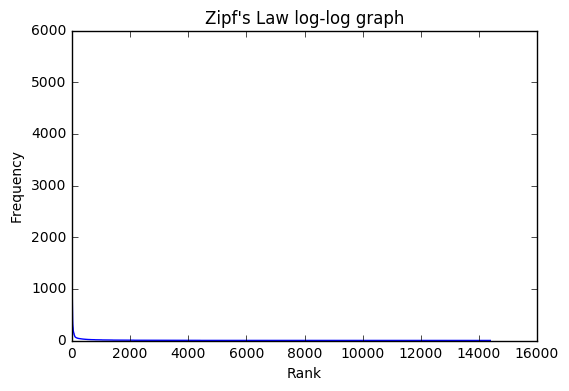

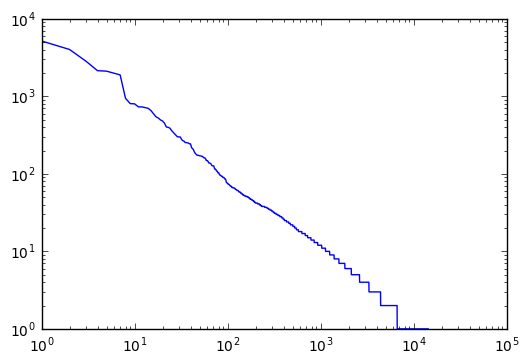

In [65]:
plot(ranks, freqs) # regular plot
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law log-log graph")
show()
loglog(ranks, freqs) # log-log plot
show()

# Question-1

Prove if zif's law works for Natural Language

In [26]:
import nltk.corpus, glob, csv, math
import matplotlib.pyplot as plt
from nltk.corpus import brown as br

In [25]:
globVar=glob.glob('C:/Users/kamal/AppData/Roaming/nltk_data/corpora/brown/ca*')
length=len(globVar)
length

45

In [30]:
words=[]
count={}
for name in glob.glob('C:/Users/kamal/AppData/Roaming/nltk_data/corpora/brown/ca*'):
    [words.append(word.lower()) for word in brown.words(name) if word.isalpha()]
print(words[:20])  

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took']


In [40]:
for word in words:
    count[word]=count.get(word,0)+1
sorted_list=sorted(count.items(), key=lambda x: x[1])
listofwords= sorted(sorted_list,key=lambda x: x[1],reverse=True)
print(listofwords[:10])

[('the', 19158), ('of', 8583), ('and', 6558), ('to', 6432), ('a', 6390), ('in', 6060), ('for', 2907), ('that', 2487), ('is', 2199), ('was', 2151)]


In [63]:
#Rank the words
def rank(list_of_sorted_words):
    ranked_words_list = []
    rank = 1;
    for word in list_of_sorted_words:
        rank_words = word[0]+','+str(rank)+','+str(word[1])
        rank+=1
        ranked_words_list.append(rank_words)
    return ranked_words_list

all_words_list = rank(listofwords)

In [55]:
with open('data_word.csv', 'wt') as csvoutput:
    writer = csv.writer(csvoutput, delimiter=',', quoting=csv.QUOTE_NONE, lineterminator='\n')
    writer.writerow(("Word", 'Rank', 'Frequency'))
    for row in all_words_list:
        element = row.split(',')
        writer.writerow(element)
    
    csvoutput.close()

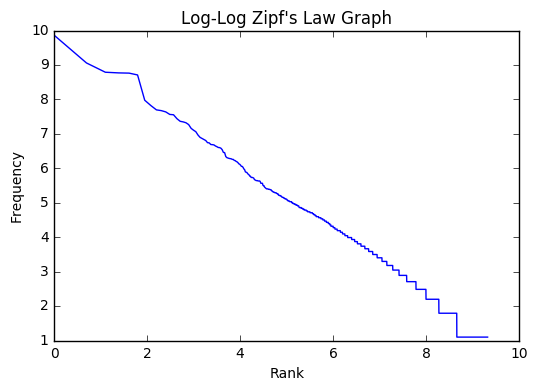

In [64]:
read_values = []
with open('data_word.csv', 'r') as file:
    reader = csv.reader(file)
    row = next(reader)
    for row in reader:
        read_values.append(row[1:])

rank = []
freq = []
for row in read_values:
    rank.append(math.log(int(row[0])))
    freq.append(math.log(int(row[1])))

plt.plot(rank, freq)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Log-Log Zipf's Law Graph")
plt.show()

# Conclusion:

We can observe from the above graph the top ranking word occured twice as often as the second most used word, and three times as often as the third most used word. Hence we can conclude zipf's law works for Natural Language. 